In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import mglearn
import seaborn as sns

(920, 1)
(920,)


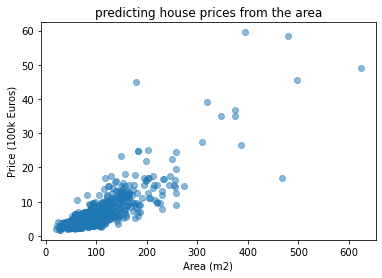

In [2]:
# A1
df=  pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')
df= df.dropna()

X = df['Area'].values.reshape(-1, 1)  
y = (df['Price'] / 100000).values

print(X.shape)
print(y.shape)

plt.scatter(X, y, alpha=0.5)
plt.title('predicting house prices from the area')
plt.xlabel('Area (m2)')
plt.ylabel('Price (100k Euros)')
plt.show()

In [3]:
#A2.1
from sklearn.model_selection import train_test_split
X_train, X_vt, y_train, y_vt= train_test_split(X, y, test_size=0.4, random_state=2024)
X_val, X_test, y_val, y_test= train_test_split(X_vt,y_vt, test_size=0.5, random_state=2024)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(552, 1) (184, 1) (184, 1)
(552,) (184,) (184,)


Text(0, 0.5, 'Price (100k Euros)')

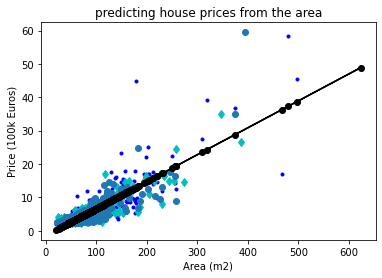

In [4]:
#A2.2
from sklearn.linear_model import LinearRegression
lr= LinearRegression().fit(X_train, y_train)

plt.figure()
plt.plot(X_train,y_train,'b.')
plt.plot(X_val, y_val,'cd')
plt.plot(X_test,y_test,'o')
# y = mx + b 
yPred = lr.coef_*X_train +lr.intercept_
plt.plot(X_train,yPred, marker= 'o', color='k' )
plt.title('predicting house prices from the area')
plt.xlabel('Area (m2)')
plt.ylabel('Price (100k Euros)')

Test set score: 0.67


Text(0, 0.5, 'Price (100k Euros)')

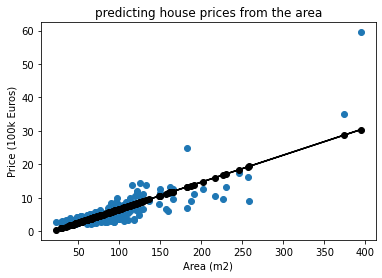

In [5]:
#A2.3
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
plt.figure()
plt.plot(X_test,y_test,'o')
# y = mx + b 
yPred = lr.coef_*X_test +lr.intercept_
plt.plot(X_test,yPred, marker= 'o', color='k' )
plt.title('predicting house prices from the area')
plt.xlabel('Area (m2)')
plt.ylabel('Price (100k Euros)')

In [6]:
#A2.4
from sklearn.preprocessing import PolynomialFeatures

for Degree in [2,3,4]:
    poly = PolynomialFeatures(degree=Degree, include_bias=False)
    poly.fit(X_train)
    X_poly_train = poly.transform(X_train)
    X_poly_val = poly.transform(X_val)
    print(X_poly_train.shape, X_train.shape)
    print(X_poly_val.shape, X_val.shape)
    
    reg = LinearRegression().fit(X_poly_train, y_train)
    score = reg.score(X_poly_val, y_val)
    print('score of polynomial of degree:{} is= {}'.format(Degree, score))
# polynomial of degree 2 scores the best        
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
X_poly_train = poly.transform(X_train)
X_poly_test = poly.transform(X_test)

print(X_poly_train.shape, X_train.shape)
print(X_poly_test.shape, X_test.shape)

reg = LinearRegression().fit(X_poly_train, y_train)
score = reg.score(X_poly_test, y_test)
print('the test performance is:{}'.format(score))

(552, 2) (552, 1)
(184, 2) (184, 1)
score of polynomial of degree:2 is= 0.74274045284681
(552, 3) (552, 1)
(184, 3) (184, 1)
score of polynomial of degree:3 is= 0.7380210408768543
(552, 4) (552, 1)
(184, 4) (184, 1)
score of polynomial of degree:4 is= 0.7320879512642254
(552, 2) (552, 1)
(184, 2) (184, 1)
the test performance is:0.6928393977715385


In [7]:
#A2.5 
from sklearn.neighbors import KNeighborsRegressor
for n_neighbors in [1,3,6]:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    score= reg.score(X_val,y_val)
    print('For regression with {} neighbors the score is:{}'.format(n_neighbors, score))
    
# regression with 3 neigbors seems to score the best
test_reg= KNeighborsRegressor(n_neighbors= 3 )
test_reg.fit(X_train,y_train)
test_score= test_reg.score(X_test,y_test)
print('score on the test_set is:{}'.format(test_score))

For regression with 1 neighbors the score is:0.45421419246139194
For regression with 3 neighbors the score is:0.6517700707163088
For regression with 6 neighbors the score is:0.6364472049701858
score on the test_set is:0.6534978325281233


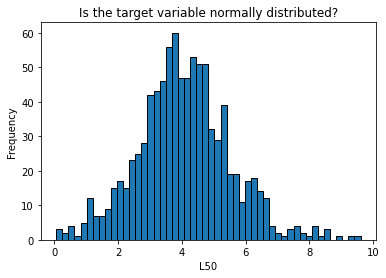

The target is normally distributed


In [8]:
#B1
dt= pd.read_csv('qsar_fish_toxicity.csv')
df= pd.DataFrame(dt)

split_columns= df.iloc[:,0].str.split(";", expand= True)
split_columns.columns= ["CIC0", "SM1 Dz(Z)", "GATS1i", "NdsCH",
"NdssC", "MLOGP", "L50"]

df = pd.concat([df, split_columns], axis = 1)
df = df.drop(columns = [df.columns[0]])
df["L50"]= df["L50"].apply(lambda x: float(x))

plt.hist(df["L50"], bins =50, edgecolor = "black")
plt.title("Is the target variable normally distributed?")
plt.xlabel("L50")
plt.ylabel("Frequency")
plt.show()
print("The target is normally distributed")

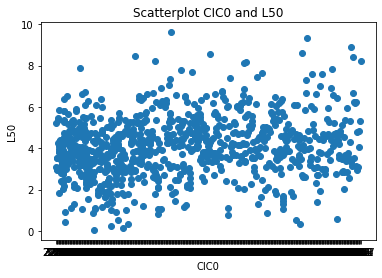

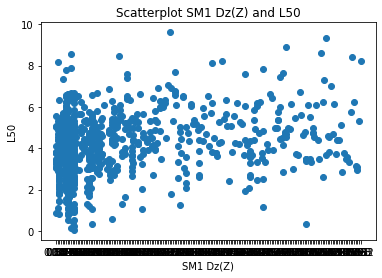

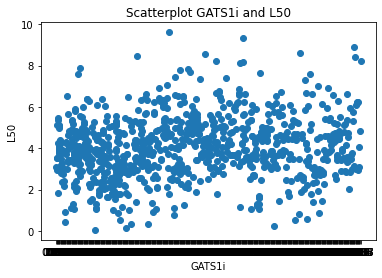

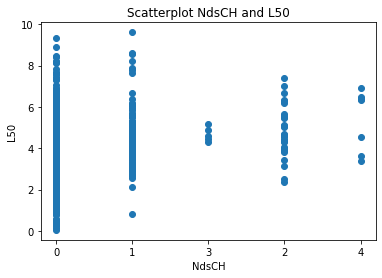

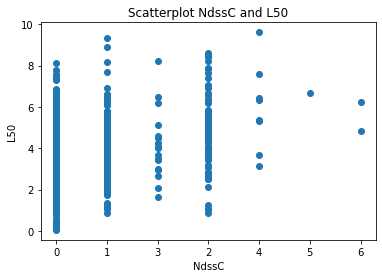

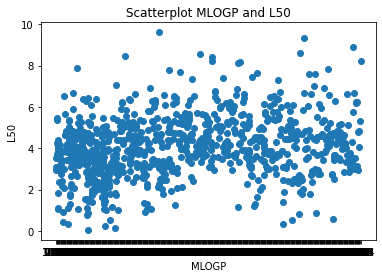

In [9]:
# B.1.2
for iv in ["CIC0", "SM1 Dz(Z)", "GATS1i", "NdsCH",
"NdssC", "MLOGP"]:
    plt.scatter(df[iv], df["L50"])
    plt.title("Scatterplot {} and L50".format(iv))
    plt.xlabel(iv)
    plt.ylabel("L50")
    plt.show()


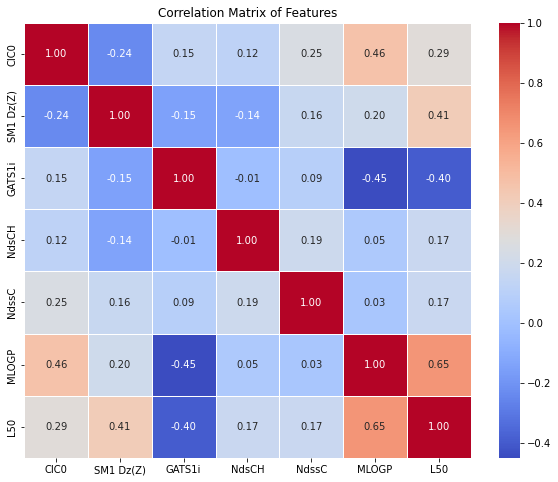

In [13]:
#B.1.3
correlation_matrix = df.corr()
df = df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [14]:
#B.2.1
from sklearn.model_selection import train_test_split
X_train, X_vt, y_train, y_vt= train_test_split(df[df.columns[:6]],df["L50"], test_size=0.4, random_state=2024)
X_val, X_test, y_val, y_test= train_test_split(X_vt,y_vt, test_size=0.5, random_state=2024)

from sklearn.linear_model import LinearRegression
lr= LinearRegression().fit(X_train, y_train)
print("The score of the linear model:{}".format(lr.score(X_test, y_test)))

The score of the linear model:0.5324023187008589


In [12]:
#B.2.2 and B.2.3
# is this a valid output?
from sklearn.linear_model import Lasso, Ridge
import pandas as pd
results= []

for i in [0.001, 0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    results.append(('Ridge regression', i, ridge.score(X_val, y_val)))
    lasso = Lasso(alpha=i, max_iter=100000).fit(X_train, y_train)
    results.append(('Lasso regression', i, lasso.score(X_val, y_val)))

df_results= pd.DataFrame(results, columns=['Regression Model', 'Alpha', 'R-squared on Validation Set'])
print(df_results)
# best result on validation set is Ridge regression with alpha value of 0.001
ridgetest= Ridge(alpha= 0.001).fit(X_train, y_train)
print('performance of Ridge regression with alpha of 0.001 on testset is:{}'.format(ridgetest.score(X_test, y_test)))

df_results.to_csv(r"C:/Users/casca/OneDrive/Bureaublad/df_results.csv")


    Regression Model    Alpha  R-squared on Validation Set
0   Ridge regression    0.001                     0.604605
1   Lasso regression    0.001                     0.604418
2   Ridge regression    0.010                     0.604601
3   Lasso regression    0.010                     0.601858
4   Ridge regression    0.100                     0.604554
5   Lasso regression    0.100                     0.513643
6   Ridge regression    1.000                     0.604072
7   Lasso regression    1.000                     0.219647
8   Ridge regression   10.000                     0.598388
9   Lasso regression   10.000                    -0.003529
10  Ridge regression  100.000                     0.549074
11  Lasso regression  100.000                    -0.003529
performance of Ridge regression with alpha of 0.001 on testset is:0.5324022112911361
